### Case Study 0 3
### Artificial Neural Network
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple, Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market, you cannot simply assume things. To solve this problem, he collects sales data of mobile phones of various companies. Bob wants to find out some relation between features of a mobile phone (eg:- RAM, Internal Memory etc) and its selling price. But he is not so good at Machine Learning. Create an artificial neural network-based classifier to help Bob. Data and class labels are available in mobile_price_classification.csv file. Use price_range column as label and remaining columns as data.

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('mobile_price_classification .csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [5]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [19]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,4.309500,0.521500,0.484621,0.501750,0.502075,4.520500,...,0.329137,0.501679,0.499255,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,0.293533,0.5001,0.326402,0.500035,4.341444,0.499662,0.292673,0.288416,0.294997,2.287837,...,0.226419,0.288518,0.289880,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,1.000000,0.000000,0.225806,0.200000,0.241667,3.000000,...,0.144260,0.250167,0.254276,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,0.484302,0.0000,0.400000,1.000000,3.000000,1.000000,0.483871,0.500000,0.508333,4.000000,...,0.287755,0.498665,0.505211,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,0.744322,1.0000,0.680000,1.000000,7.000000,1.000000,0.741935,0.800000,0.750000,7.000000,...,0.483291,0.756342,0.750534,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1.000000,1.0000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,8.000000,...,1.000000,1.000000,1.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Standardising the features

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['battery_power'] = sc.fit_transform(df[['battery_power']])
df['clock_speed'] = sc.fit_transform(df[['clock_speed']])
df['int_memory'] = sc.fit_transform(df[['int_memory']])
df['mobile_wt'] = sc.fit_transform(df[['mobile_wt']])
df['px_height'] = sc.fit_transform(df[['px_height']])
df['px_width'] = sc.fit_transform(df[['px_width']])
df['ram'] = sc.fit_transform(df[['ram']])

### Splitting Dataset into train and test

In [7]:
data = df.drop('price_range',axis=1)
label = df.price_range

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=42)

In [9]:
X_train.shape

(1500, 20)

### Fitting ANN model

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 2.6394 - accuracy: 0.2493
Epoch 2/100
47/47 [==============================] - 0s 991us/step - loss: 1.9164 - accuracy: 0.2567
Epoch 3/100
47/47 [==============================] - 0s 697us/step - loss: 1.6883 - accuracy: 0.2567
Epoch 4/100
47/47 [==============================] - 0s 727us/step - loss: 1.5754 - accuracy: 0.2560
Epoch 5/100
47/47 [==============================] - 0s 925us/step - loss: 1.5135 - accuracy: 0.2540
Epoch 6/100
47/47 [==============================] - 0s 718us/step - loss: 1.4708 - accuracy: 0.2747
Epoch 7/100
47/47 [==============================] - 0s 873us/step - loss: 1.4440 - accuracy: 0.2847
Epoch 8/100
47/47 [==============================] - 0s 803us/step - loss: 1.4157 - accuracy: 0.3047
Epoch 9/100
47/47 [==============================] - 0s 697us/step - loss: 1.3985 - accuracy: 0.3147
Epoch 10/100
47/47 [==============================] - 0s 746us/step - loss: 1.3738 - accuracy

* Here we got an acuuracy of 85.73 %

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


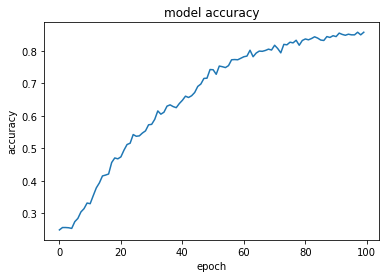

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

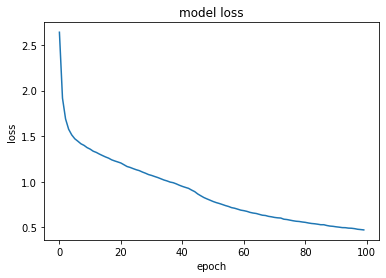

In [23]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()